### Plotting File for [Redistributing the Gains From Trade Through Progressive Taxation](http://www.waugheconomics.com/uploads/2/2/5/6/22563786/lw_tax.pdf)

This notebook imports the output from the MATLAB code and then plots it. Description is below.

In [96]:
from  IPython.display  import display, Image # Displays things nicely
import pandas as pd
import weightedcalcs as wc
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

#fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\tradeexposure\\figures"

---

## Read in output from model

This is the structure of the mat file and the naming conventions. Here it is assumed that the .mat files from Matlab are within the working directory. Then read it in, note the use of ``scipy`` package to get a .mat file into python.

In [97]:
#[params.trade_cost, trade, ls, move, output_per_hour, welfare, double(exit_flag)];

column_names = ["tau_p", "tau", "trade_volume", "ls", "migration", "output", "OPterm2", "welfare", "exitflag", "welfare_smth", 
               "trade_share"]

values = ["0.05","0.1", "0.2", "0.3", "0.4"]

In [98]:
all_df = pd.DataFrame([])

for val in values:
    
    file_name = "results" + val + ".mat" 
    
    mat = loadmat(file_name) 
    
    df = pd.DataFrame(mat["results"])
    
    df["9"] = val
    
    all_df = all_df.append(df)

all_df.columns = column_names

all_df.head(10)

,tau_p,tau,trade_volume,ls,migration,output,OPterm2,welfare,exitflag,welfare_smth,trade_share
0,-0.25,5.618187,0.000152,0.668266,0.032447,0.883510,0.107618,-28.726136,0.0,-28.751987,0.05
1,-0.20,5.618187,0.000014,0.668605,0.032028,0.882964,0.107011,-28.667266,0.0,-28.690659,0.05
2,-0.15,5.618187,0.000013,0.671087,0.031368,0.884684,0.106135,-28.625266,0.0,-28.636817,0.05
3,-0.10,5.618187,0.000013,0.673402,0.030608,0.886205,0.105290,-28.595096,0.0,-28.590461,0.05
4,-0.05,5.618187,0.000017,0.673668,0.029782,0.884441,0.103764,-28.559670,0.0,-28.551590,0.05
5,0.00,5.618187,0.002605,0.675654,0.030969,0.885392,0.103406,-27.710008,5.0,-28.520206,0.05
6,0.01,5.618187,0.000547,0.674134,0.028795,0.879043,0.099788,-28.316082,4.0,-28.514827,0.05
7,0.02,5.618187,0.000033,0.674365,0.028168,0.880624,0.100636,-28.626385,0.0,-28.509748,0.05
8,0.03,5.618187,0.000966,0.674854,0.027706,0.877738,0.098594,-28.600313,4.0,-28.504968,0.05
9,0.04,5.618187,0.000012,0.674204,0.028156,0.881479,0.101262,-28.518362,0.0,-28.500488,0.05


Now define some functions that we will use...

In [99]:
def cons_eqiv(df):
    
    maxwel = float(df["welfare_smth"][df["tau_p"] == 0.18])
        
    df["cons_eqiv"] = 100*(np.exp((1-0.95)*(df["welfare_smth"] - maxwel))-1)
    # These are consumptione equivialents. 
    
    return df

Group on the trade share values....

In [100]:
grp = all_df.groupby("trade_share")

grp = grp.apply(cons_eqiv)

grp = grp.groupby("trade_share")

---

## Optimal policy in the model

Then the next two code cells will replicate Figure 3 and Figure 6 in the paper...

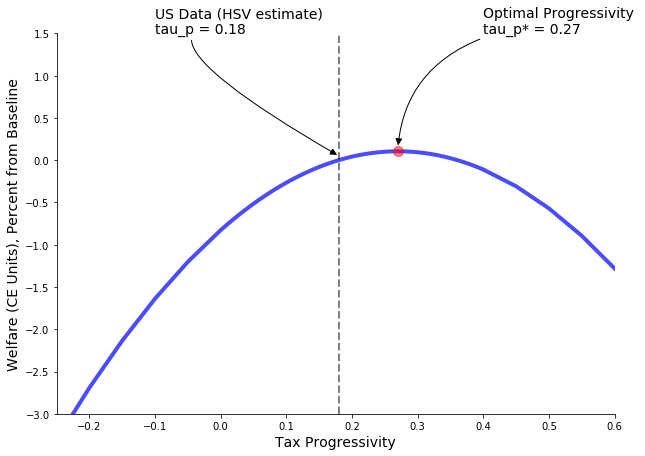

In [101]:
fig, ax = plt.subplots(figsize = (10,7))

val = "0.1"

ax.plot(grp.get_group(val).tau_p, grp.get_group(val).cons_eqiv,
        linewidth = 4, label = "Imports/GDP = " + val, 
        color = "blue",alpha = 0.70)


index_max = grp.get_group(val).cons_eqiv.idxmax()

tau_max = grp.get_group(val).tau_p.iloc[index_max]

ax.plot(tau_max, 
        grp.get_group(val).cons_eqiv.iloc[index_max], 'ro',
        markersize=10, linewidth = 50,
        color = "red",alpha = 0.50)


ax.set_ylabel("Welfare (CE Units), Percent from Baseline", fontsize = 14)
ax.set_xlabel("Tax Progressivity", fontsize = 14)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.axvline(x = 0.18,         
           color='k',      
           linestyle='--',
           lw = 2, alpha = 0.5)    

#ax.legend(fontsize = 14, frameon=False)


ax.annotate(
    "Optimal Progressivity \ntau_p* = " + str(tau_max), 
    xy=(tau_max, 0.15), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0.4, 1.5), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=85",
        "color": "black"
    },
    fontsize=14,
)


ax.annotate(
    "US Data (HSV estimate) \ntau_p = 0.18", 
    xy=(0.18, 0.05), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(-0.10, 1.5), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=0,angleB=150",
        "color": "black"
    },
    fontsize=14,
)

ax.set_xlim(-0.25,0.6)
ax.set_ylim(-3,1.5)

#plt.savefig(fig_path + "\\social_welfare_baseline.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

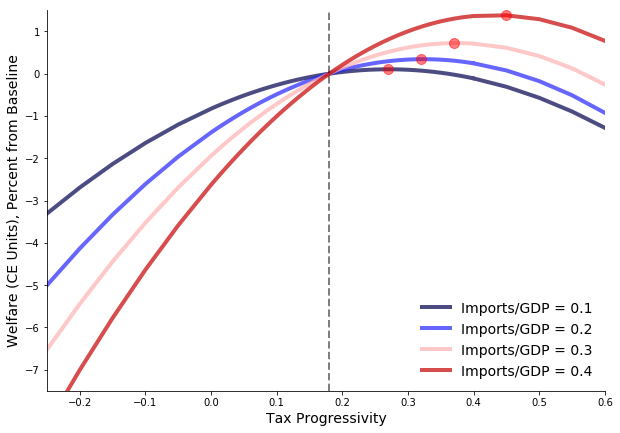

In [102]:
fig, ax = plt.subplots(figsize = (10,7))

ax.set_prop_cycle('color',plt.cm.seismic(np.linspace(0,1.15,5)))

welfare_opt = []
tax_opt = []

flat_loss = []

oxford_data = pd.DataFrame()   


for val in values[1:]:
    
    ax.plot(grp.get_group(val).tau_p, grp.get_group(val).cons_eqiv,
        linewidth = 4, label = "Imports/GDP = " + val, alpha = 0.70)
    
    index_max = grp.get_group(val).cons_eqiv.idxmax()
    
    ax.plot(grp.get_group(val).tau_p.iloc[index_max], 
        grp.get_group(val).cons_eqiv.iloc[index_max], marker ="o",
        markersize=10, linewidth = 50,
        color = "red",alpha = 0.50)
    
    welfare_opt.append(grp.get_group(val).cons_eqiv.iloc[index_max])
    tax_opt.append(grp.get_group(val).tau_p.iloc[index_max])
    
    oxford_data = pd.concat([oxford_data, grp.get_group(val).cons_eqiv],axis=1)
    
    flat_idx = grp.get_group(val).tau_p == 0
    flat_loss.append(float(grp.get_group(val).cons_eqiv[flat_idx]))

ax.set_ylabel("Welfare (CE Units), Percent from Baseline", fontsize = 14)
ax.set_xlabel("Tax Progressivity", fontsize = 14)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.axvline(x = 0.18,         
           color='k',      
           linestyle='--',
           lw = 2, alpha = 0.5)    

ax.legend(fontsize = 14, frameon=False)

ax.set_xlim(-0.25,0.6)
ax.set_ylim(-7.5,1.5)

#plt.savefig(fig_path + "\\social_welfare_prog_diff_tau_fine.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

###########################################################################################################

#oxford_data = pd.concat([oxford_data, grp.get_group(val).tau_p],axis=1)

#oxford_names = values

#oxford_names.append("tax_progressivity") 

#oxford_data.columns = oxford_names[1:]

#values.remove("tax_progressivity")

#oxford_data.to_excel('oxford_fig2.xlsx')

In [104]:
print(welfare_opt)
print(tax_opt)
print(flat_loss)

#grp.get_group(val).head()

[0.10435983980994212, 0.34328431738519516, 0.7242843517205388, 1.3810768398272222]
[0.27, 0.32, 0.37, 0.44999999999999996]
[-0.8279921208671714, -1.3903253040046915, -1.9424125246026658, -2.628430117595859]


This finds the optimal tau...

In [105]:
opt_tau = []

tau = []

trade = []

for val in values:
    
    index_max = grp.get_group(val).cons_eqiv.idxmax()
    
    tau_star = grp.get_group(val).tau_p.iloc[index_max]
    
    opt_tau.append(tau_star)
    
    
    tau.append(grp.get_group(val).tau.iloc[index_max])
    
    trade.append(float(val))
    
hold = {"opt_tau": opt_tau, "trade": trade, "tau": tau}

opt_df = pd.DataFrame(hold)

opt_df.head(10)

,opt_tau,tau,trade
0,0.18,5.618187,0.05
1,0.27,2.332627,0.10
2,0.32,1.964557,0.20
3,0.37,1.749793,0.30
4,0.45,1.586763,0.40


This then generates the output cost figure, Figure 8 in the paper.

In [106]:
def smooth_reg(df, series):
    
    specification = series + "~ tau_p + np.square(tau_p) + np.power(tau_p,3)+ np.power(tau_p,4)"
    
    results = smf.ols(specification ,     # This is the model in variable names we want to estimate
                  data=df[df["exitflag"]==0]).fit()  
    
    pred = results.predict(exog = df["tau_p"])
    
    #print(results.summary())
    
    return pred


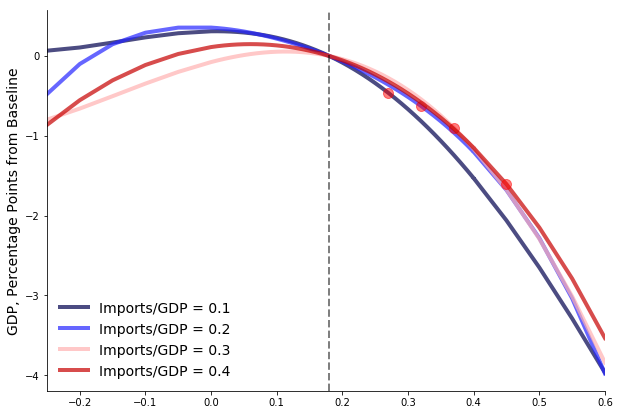

In [107]:
fig, ax = plt.subplots(figsize = (10,7))

series = "output"

ax.set_prop_cycle('color',plt.cm.seismic(np.linspace(0,1.15,5)))

for val in values[1:]:

#baseline = float(grp.get_group(val)[grp.get_group(val).tau_p == 0.18][series])
    ypred = smooth_reg(grp.get_group(val), series)

    baseline = float(ypred[grp.get_group(val).tau_p == 0.18])

    real = grp.get_group(val)[series]

    index_max = grp.get_group(val).cons_eqiv.idxmax()

    ax.plot(grp.get_group(val).tau_p, 100*(ypred/baseline - 1),
        linewidth = 4, label = "Imports/GDP = " + val, alpha = 0.70)
   
    index_max = grp.get_group(val).cons_eqiv.idxmax()
    
    ax.plot(grp.get_group(val).tau_p.iloc[index_max], 
        100*(ypred.iloc[index_max]/baseline - 1), marker ="o",
        markersize=10, linewidth = 50,
        color = "red",alpha = 0.50)
    
####################################################################################

ax.axvline(x = 0.18,         
           color='k',      
           linestyle='--',
           lw = 2, alpha = 0.5)   

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("GDP, Percentage Points from Baseline", fontsize = 14)

ax.legend(fontsize = 14, frameon=False)

ax.set_xlim(-0.25,0.6)

#plt.savefig(fig_path + "\\output_cost.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

This then generates the allocative efficiency (covariance term) figure, Figure 4

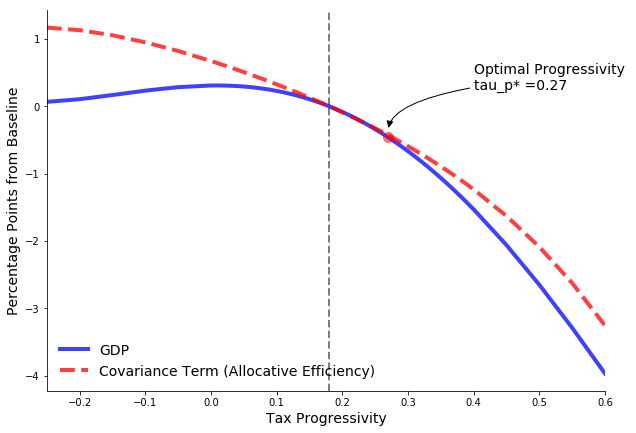

In [108]:
fig, ax = plt.subplots(figsize = (10,7))

series = "output"

val = "0.1"

#baseline = float(grp.get_group(val)[grp.get_group(val).tau_p == 0.18][series])

ypred = smooth_reg(grp.get_group(val), series)

baseline = float(ypred[grp.get_group(val).tau_p == 0.18])

real = grp.get_group(val)[series]

index_max = grp.get_group(val).cons_eqiv.idxmax()

ax.plot(grp.get_group(val).tau_p, 100*(ypred /baseline-1),
        linewidth = 4, label = "GDP", 
        color = 'blue', alpha = 0.75)

optimal_prog = grp.get_group(val).tau_p.iloc[index_max]

ax.plot(optimal_prog, 
        100*(ypred /baseline-1).iloc[index_max], 'ro',
        markersize=10, linewidth = 50,
        color = "red",alpha = 0.50)


####################################################################################
series = "OPterm2"

ypred = smooth_reg(grp.get_group(val), series)

ypred_output = smooth_reg(grp.get_group(val), "output")

baseline_output = float(ypred_output[grp.get_group(val).tau_p == 0.18])

baseline = float(ypred[grp.get_group(val).tau_p == 0.18])

real = grp.get_group(val)[series]

index_max = grp.get_group(val).cons_eqiv.idxmax()

ax.plot(grp.get_group(val).tau_p, 100*((ypred)/ypred_output - baseline/baseline_output),
        linewidth = 4, label = "Covariance Term (Allocative Efficiency)", 
        alpha = 0.75, color = "red", linestyle='--')

####################################################################################

ax.axvline(x = 0.18,         
           color='k',      
           linestyle='--',
           lw = 2, alpha = 0.5)   

ax.annotate(
    "Optimal Progressivity \ntau_p* =" + str(optimal_prog), 
    xy=(0.27, -0.35), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0.4, 0.25), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=85",
        "color": "black"
    },
    fontsize=14,
)


ax.set_ylabel("Percentage Points from Baseline", fontsize = 14)
ax.set_xlabel("Tax Progressivity", fontsize = 14)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim(-0.25,0.6)

ax.legend(loc = "lower left", fontsize = 14, frameon=False)

#plt.savefig(fig_path + "\\output_baseline.pdf", bbox_inches = "tight", dip = 3600)

plt.show()


Then the migration figure, Figure 5

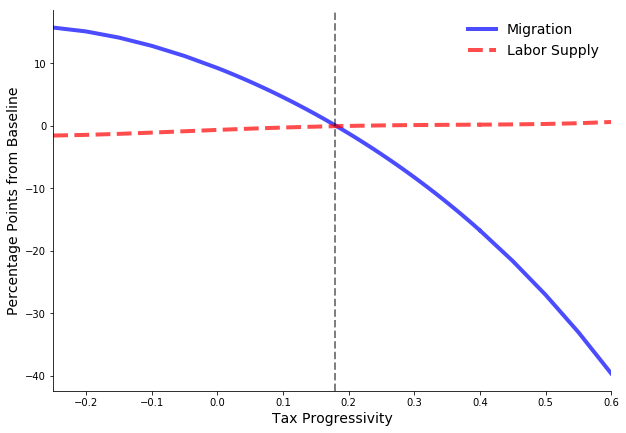

In [109]:
fig, ax = plt.subplots(figsize = (10,7))

series = "migration"

val = "0.1"

baseline = float(grp.get_group(val)[grp.get_group(val).tau_p == 0.18][series])

ypred = smooth_reg(grp.get_group(val), series)

ax.plot(grp.get_group(val).tau_p, 100*(ypred /baseline-1),
        linewidth = 4, label = "Migration", 
        color = 'blue', alpha = 0.70)

series = "ls"

val = "0.1"

baseline = float(grp.get_group(val)[grp.get_group(val).tau_p == 0.18][series])

ypred = smooth_reg(grp.get_group(val), series)

real = grp.get_group(val)[series]

ax.plot(grp.get_group(val).tau_p, 100*(ypred /baseline-1),
        linewidth = 4, label = "Labor Supply", 
        color = 'red', alpha = 0.70, linestyle = "--")

###########################################################################################

ax.axvline(x = 0.18,         
           color='k',      
           linestyle='--',
           lw = 2, alpha = 0.5)   

ax.set_ylabel("Percentage Points from Baseline", fontsize = 14)
ax.set_xlabel("Tax Progressivity", fontsize = 14)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(fontsize = 14, frameon=False)

ax.set_xlim(-0.25,0.6)

#plt.savefig(fig_path + "\\migration_baseline.pdf", bbox_inches = "tight", dip = 3600)


plt.show()

---

## Marginal tax rates in the model

In [110]:
values_TAX = ["0.05","0.1b", "0.1", "0.2", "0.3", "0.4"]

mat = loadmat("opt_marg_rates") 
 
marginal_rates = pd.DataFrame(mat["marg_rates"])

marginal_rates.columns = values_TAX

mat = loadmat("opt_incom_prct") 
    
income_pct = pd.DataFrame(mat["incom_prct"])

income_pct.columns = values_TAX

In [111]:
def smooth_marg_rates(income_pct, marginal_rates, op_level):
    
    df = pd.DataFrame([income_pct.T.loc[op_level], marginal_rates.T.loc[op_level]])
    
    df = df.T
    
    df.columns = ["inc_prct", "marg_rates"]
    
    specification = '''marg_rates ~ np.log(inc_prct) + np.square(np.log(inc_prct)) + 
    np.power(np.log(inc_prct),3)+ np.power(np.log(inc_prct),4)'''
    
    results = smf.ols(specification ,     # This is the model in variable names we want to estimate
                  data=df).fit()  
    
    pred = results.predict(exog = df["inc_prct"])
    
    #print(results.summary())
    
    return pred


48.08660450829356
52.83763415842769
56.82176121850468
63.580426059183345


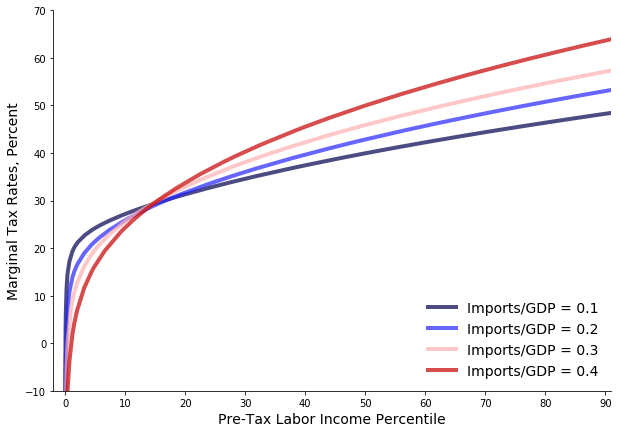

In [114]:
fig, ax = plt.subplots(figsize = (10,7))

ax.set_prop_cycle('color',plt.cm.seismic(np.linspace(0,1.15,5)))


for val in values[1:]:
        
    pred = smooth_marg_rates(income_pct, marginal_rates, val)
    
    #ax.plot(100*(income_pct[val]), 100*pred,linewidth = 4, 
     #   alpha = 0.70,  label = "Imports/GDP = " + val)
        
    if val ==  "0.1b":
        print(" ")
        ax.plot(100*income_pct[val], 100*pred,linewidth = 4, 
        alpha = 0.70, color = "black", linestyle = '--', label = "Baseline")
        
        
        
        
    else: 
        ax.plot(100*income_pct[val], 100*pred,linewidth = 4, 
        alpha = 0.70, label = "Imports/GDP = " + val)
        
        idx = (np.abs(income_pct[val]-0.90)).idxmin()
        print(100*pred[idx])
    
##############################################################################
    
ax.set_ylabel("Marginal Tax Rates, Percent", fontsize = 14)
ax.set_xlabel("Pre-Tax Labor Income Percentile", fontsize = 14)

ax.set_ylim(-10,70)
ax.set_xlim(-2,91)

test = list(range(0,100,10))
#test.append(90) 

ax.set_xticks(test)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc = "lower right", fontsize = 14, frameon=False)

#plt.savefig(fig_path + "\\marginal_rates.pdf", bbox_inches = "tight", dip = 3600)


plt.show()

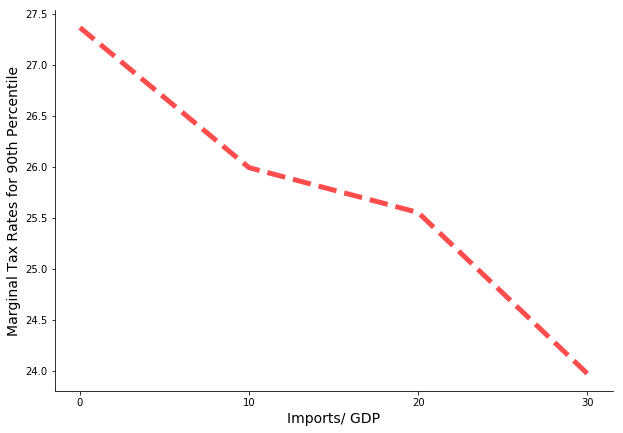

In [115]:
opt_tax = []

prctile_income = 0.10

for val in values_TAX[1:]:
        
    pred = smooth_marg_rates(income_pct, marginal_rates, val)
    
    #ax.plot(100*(income_pct[val]), 100*pred,linewidth = 4, 
     #   alpha = 0.70,  label = "Imports/GDP = " + val)
        
    if val ==  "0.1b":
        print(" ")
        
    else: 
        
        idx = (np.abs(income_pct[val]-prctile_income)).idxmin()
        
        opt_tax.append(100*pred[idx])
        
#######################################################################

elasticity = (opt_tax[-1] - opt_tax[1])/(40-10)

fig, ax = plt.subplots(figsize = (10,7))

ax.plot(values[1:], opt_tax, linewidth = 5, alpha = 0.70, color = "red", linestyle = '--')


#test.append(90)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("Marginal Tax Rates for 90th Percentile", fontsize = 14)
ax.set_xlabel("Imports/ GDP", fontsize = 14)

#ax.set_ylim(35,70)

test = list(range(0,100,10))
#test.append(90) 

ax.set_xticklabels(test)

plt.show()

In [116]:
def gains_trade(df, tax_policy):
    
    new_df = df[df.tau_p == tax_policy]
    
    basewel = float(new_df["welfare"][new_df["trade_share"] == "0.1"])
    
    new_df["cons_eqiv"] = 100*(np.exp((1-0.95)*(new_df["welfare_smth"] - basewel))-1)
        
    return new_df 

In [117]:
gains_trade(all_df, 0.18)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tau_p,tau,trade_volume,ls,migration,output,OPterm2,welfare,exitflag,welfare_smth,trade_share,cons_eqiv
23,0.18,5.618187,0.000335,0.675999,0.025735,0.874454,0.095103,-28.326508,4.0,-28.469203,0.05,-4.854870
23,0.18,2.332627,0.100000,0.669897,0.030013,0.923728,0.131156,-27.473867,0.0,-27.466803,0.1,0.035327
23,0.18,1.964557,0.199995,0.664235,0.034940,0.984587,0.170415,-26.243223,0.0,-26.248914,0.2,6.316218
23,0.18,1.749793,0.298350,0.663461,0.040580,1.064237,0.217154,-24.890919,0.0,-24.877915,0.3,13.859790
23,0.18,1.586763,0.400001,0.660024,0.047488,1.162323,0.277968,-23.286898,0.0,-23.270629,0.4,23.387781


In [118]:
#100*(-27.633091 / -(-26.18) + 1)

100*(np.exp((1-0.95)*(-26.528930- -27.633091))-1)

5.676045081803949

In [119]:
100*(-27.633091 / -(-26.528930) + 1)

100*(np.exp((1-0.95)*(-26.248914- -27.466803))-1)

6.278673112736799

In [120]:
100*(np.exp((1-0.95)*(-26.248914- -27.633091))-1)

7.166000196937894

In [121]:
7.16/5.67

1.2627865961199294